[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/storopoli/ciencia-de-dados/master?filepath=notebooks%2FAula_9_graficos.ipynb)
<br>
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/storopoli/ciencia-de-dados/blob/master/notebooks/Aula_9_graficos.ipynb)

# Gráficos

**Objetivos**: Apresentar a biblioteca `matplolib`, e `Pandas.plot`.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
mtcars = pd.read_csv("data/mtcars.csv", index_col=0)

## Análise Exploratória de Dados

**Def:** Procedimentos para analisar dados, técnicas para interpretar os resultados de tais procedimentos, formas de planejar a coleta de dados para tornar sua análise mais fácil, ou mais precisa, e todo o mecanismo e resultados das estatísticas aplicáveis à análise de dados (Tukey, 1977)

### 1-D - Histograma

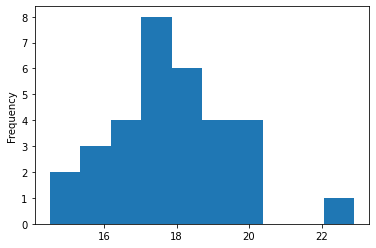

In [3]:
# pd.Series.plot()
mtcars['qsec'].plot(kind='hist')
plt.show()

## 2-D - Dispersão

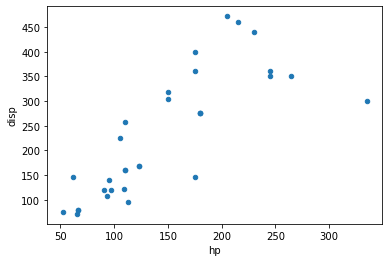

In [4]:
# pd.DataFrame.plot()
mtcars.plot(x='hp', y='disp', kind='scatter')
plt.show()

## N-D - Correlação (*Pairplot*)

In [5]:
mtcars.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

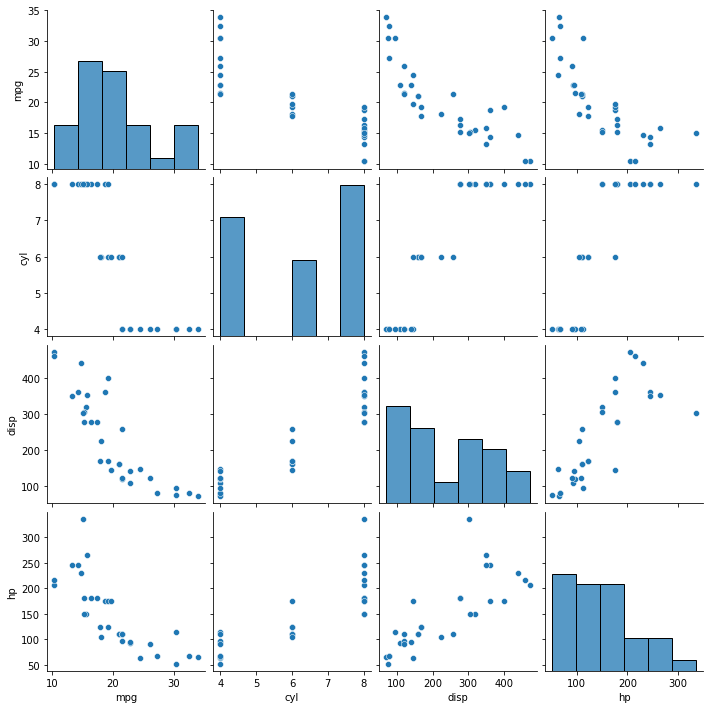

In [6]:
sns.pairplot(mtcars.loc[:,'mpg':'hp'])
plt.show()

## Matplotlib

* Convenção: `import matplolib.pyplot as plt`
* Etapas
	1. Preparação dos Dados
	2. Criação do Gráfico
	3. Plot do Gráfico
	4. Customização do Gráfico
	5. Salvar o Gráfico
	6. Imprimir o Gráfico - `plt.show()`

### Anatomia de uma figura

* Figura (Figure)
* Sub-Figuras (Axis)
* Eixo X (X-axis)
	* Label
	* Ticks
	* Limits
* Eixo Y (Y-axis)
	* Label
	* Ticks
	* Limits
* Título (Title)
* Legenda (Legend)
* Objetos (plots)

<img src="images/matplotlib-fig-anatomy.png" alt="matplotlib-fig-anatomy" style="width: 400px;"/>

<img src="images/matplotlib-anatomy.png" alt="matplotlib-anatomy" style="width: 400px;"/>

### Exemplo - Relações Lineares, Quadráticas e Cúbicas

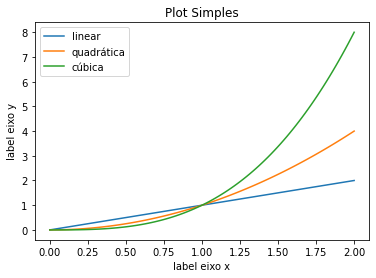

In [8]:
x = np.linspace(0, 2, 100) # entre 0 e 2 com 100 quebras iguais

plt.plot(x, x, label='linear') # Linha Linear
plt.plot(x, x**2, label='quadrática') # Linha Quadrática
plt.plot(x, x**3, label='cúbica') # Linha Cúbica

plt.xlabel('label eixo x')
plt.ylabel('label eixo y')

plt.title('Plot Simples')

plt.legend() # Incluindo Legenda

plt.show()

### Customizando o Gráfico

[Muitas opções!](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot)

In [9]:
np.linspace(0,2, 5)

array([0. , 0.5, 1. , 1.5, 2. ])

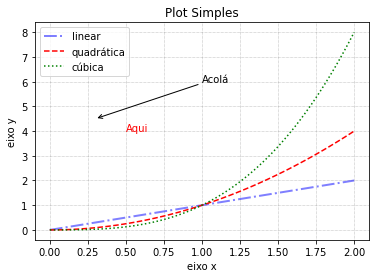

In [10]:
x = np.linspace(0, 2, 100) # entre 0 e 2 com 100 quebras iguais

plt.plot(x, x, 'b-.', label='linear', linewidth=2, alpha = 0.5) # azul (b) padrão (-.-.-)
plt.plot(x, x**2, 'r--', label='quadrática') # vermelho (r) padrão (----)
plt.plot(x, x**3, 'g:', label='cúbica') # verde (g) padrão (....)

plt.xlabel('eixo x')
plt.ylabel('eixo y')

plt.title('Plot Simples')

plt.annotate('Aqui', xy=(0.5, 4), color = 'red') # Anotando texto em vermelho
plt.annotate('Acolá',                         # Anotando texto com uma seta
             xy=(0.3, 4.5), xycoords = 'data',
             xytext=(1,6.0), textcoords='data',
             arrowprops=dict(arrowstyle='->',
                             connectionstyle='arc3'))


plt.xticks(np.linspace(0,2, 9))  # Definindo os 'ticks' do eixo X
plt.yticks(np.linspace(0,8, 9))  # Definindo os 'ticks' do eixo X
#plt.xlim(-0.5, 2.5)  # Definindo os limites do eixo X
#plt.ylim(2, 10)  # Definindo os limites do eixo X

plt.grid(color='grey', linestyle=':', linewidth=0.5)  # Inserindo grade no gráfico

plt.legend()

plt.show()

### Mútiplos plots com `plt.subplots()`

[Documentação](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html#matplotlib.pyplot.subplot)

`fig, axes = plt.subplot(M,N)` 

* M são linhas
* N são colunas

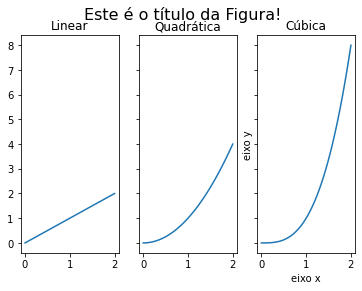

In [11]:
fig, axes = plt.subplots(1, 3, sharey='row')
x = np.linspace(0, 2, 100) # entre 0 e 2 com 100 quebras iguais

axes[0].plot(x, x) # Linha Linear
axes[0].set_title('Linear')


axes[1].plot(x, x**2) # Linha Quadrática
axes[1].set_title('Quadrática')

axes[2].plot(x, x**3) # Linha Cúbica
axes[2].set_title('Cúbica')

plt.xlabel('eixo x')
plt.ylabel('eixo y')

fig.suptitle('Este é o título da Figura!', fontsize=16)

plt.show()

### Tipos de Gráfico

#### Linha `plt.plot()`
[Documentação](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)

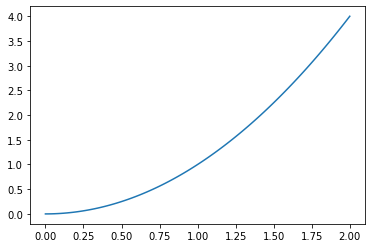

In [12]:
x = np.linspace(0, 2, 100)
plt.plot(x, x**2)
plt.show()

#### Dispersão `plt.scatter()`
[Documentação](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter)

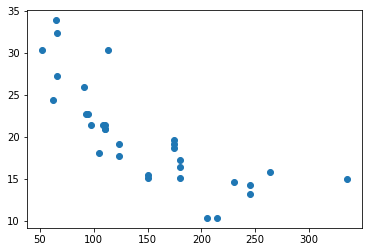

In [13]:
x = mtcars['hp']
y = mtcars['mpg']

plt.scatter(x, y)

plt.show()

#### Barra `plt.bar()`
[Documentação](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar)

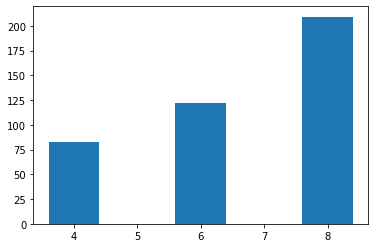

In [14]:
cyl_grouped = mtcars.groupby('cyl').mean().reset_index()

plt.bar(cyl_grouped['cyl'], cyl_grouped['hp'])

plt.show()

#### Barra Horizontal `plt.barh()`
[Documentação](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.barh.html#matplotlib.pyplot.barh)

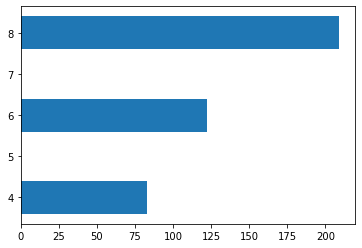

In [15]:
cyl_grouped = mtcars.groupby('cyl').mean().reset_index()

plt.barh(cyl_grouped['cyl'], cyl_grouped['hp'])

plt.show()

#### Histograma `plt.hist()`
[Documentação](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist)

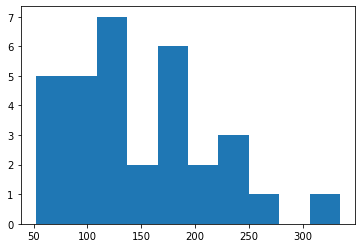

In [16]:
x = mtcars['hp']

plt.hist(x)

plt.show()

#### Pizza `plt.pie()`
[Documentação](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.pie.html#matplotlib.pyplot.pie)

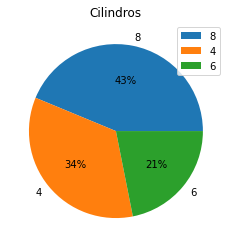

In [17]:
cyl_frequency = mtcars['cyl'].value_counts()

plt.pie(cyl_frequency, labels = cyl_frequency.index, autopct='%1.i%%')

plt.legend()

plt.title('Cilindros')

plt.show()

#### Violin `plt.violinplot()`
[Documentação](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.violinplot.html#matplotlib.pyplot.violinplot)

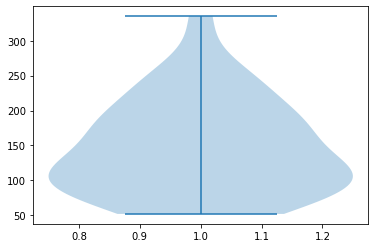

In [18]:
x = mtcars['hp']

plt.violinplot(x)

plt.show()

#### Area `plt.stackplot()`
[Documentação](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.stackplot.html#matplotlib.pyplot.stackplot)

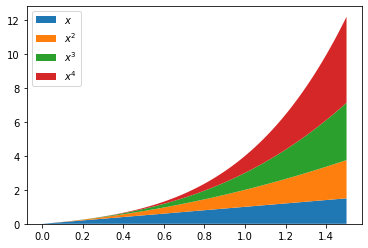

In [19]:
x = np.linspace(0, 1.5, 100)

labels = [r'$x$', r'$x^2$', r'$x^3$', r'$x^4$']
plt.stackplot(x, x, x**2, x**3, x**4, labels=labels)
plt.legend(loc='upper left')

plt.show()

### Salvando um gráfico `plt.savefig()`

[Documentação](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.savefig.html#matplotlib.pyplot.savefig)

**Importante**: Lançar antes do `plt.show()`

Aceita:
* PDF
* PNG
* JPG
* SVG

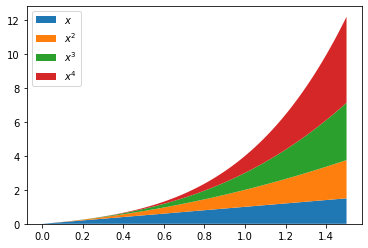

In [20]:
x = np.linspace(0, 1.5, 100)

labels = [r'$x$', r'$x^2$', r'$x^3$', r'$x^4$']
plt.stackplot(x, x, x**2, x**3, x**4, labels=labels)
plt.legend(loc='upper left')

plt.savefig('images/salvando_figura.png', dpi=300)

plt.show()

## Pandas `pd.plot()`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

API direta do pandas para matplolib. Recomendações:
* Para `DataFrames`: `pd.plot()`
* Para qualquer outra coisa (em especial `np.arrays`): `plt.plot()`

#### Como funciona?

`DataFrame.plot()`:
* `x` aqui pode ser também `Pd.Series.plot()`
* `y`
* `kind`:
    * Linha (padrão): `'line'`
    * Barra: `'bar'`
    * Barra Horizontal: `'barh'`
    * Histograma: `'hist'`
    * Caixa: `'box'`
    * Densidade: `'density'`
    * Area: `'area'`
    * Dispersão: `'scatter'`
    * Hexagonal: `'hexbin'`
    * Pizza: `'pie'`
* `subplots`:
	* `sharex`
	* `sharey`
	* `layout`: tupla (M,N)
* `figsize`: tupla(X, Y)
* `sort_columns`: Ordenar colunas?
* `title`: Título
* `legend`: Legenda
* Escala Logarítmica:
	* `logx`: Eixo X
	* `logy`: Eixo Y
	* `loglog`: Eixo X e Y
* Eixos X e Y
	* Ticks
		* `xticks`
		* `yticks`
	* Limites
		* `xlim`
		* `ylim`
	* `secondary_y`: Eixo Y secundário

#### Salvando Figuras do Pandas?

Mesmo esquema do `plt.savefig()`

1. Importe pandas e matplolib.pyplot
2. Plote a figura com `pd.plot()`
3. Salve com `plt.savefig`

## Atividade

### Dataset Titanic

Contém 891 passageiros reais do Titanic que afundou em 15/04/1912 matando 1502 de 2224 passageiros e tripulação que estavam a bordo.

* `survived`: *dummy* `0` ou `1` 
* `pclass`: Classe do Passageiro
    - `1`: Primeira Classe
    - `2`: Segunda Classe
    - `3`: Terceira Classe
* `sex`: Sexo `male` ou `female`
* `age`: Idade
* `sibsp`: Número de Irmãos (*Siblings*) e Esposas (*spouse*) a bordo
* `parch`: Número de pais/filhos a bordo
* `fare`: Valor pago pela passagem em libras
* `embarked`: Porto que embarcou
    - `C`: Cherbourg
    - `Q`: Queenstown
    - `S`: Southampton)
* `class`: Mesmo que `pclass` só que em texto
* `adult_male`: *dummy* para `age > 16` e `sex == 'male'`
* `deck`: Qual deck a cabine do passageiro se situava
* `alive`: Mesmo que survived só que com `yes` ou `no`
* `alone`: *dummy* para se viajava sozinho

<img src="images/titanic.png" alt="titanic" style="width: 500px;"/>

In [21]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Diferença entre idades por sexo

Use o `pd.hist()` e faça um histograma com `age` por `sex` (use o argumento `by`)

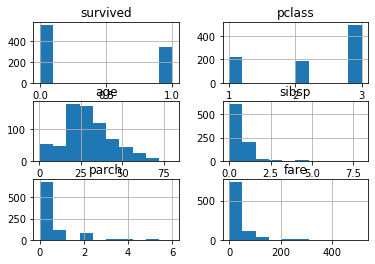

In [22]:
titanic.hist()
plt.show()

### Identificando Sobreviventes

Use `pd.plot()` na coluna `survived` com o `kind = 'bar'` ou `kind='barh'` para identificar sobreviventes (use o método `value_counts()`)

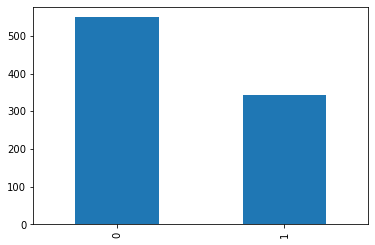

In [23]:
titanic['survived'].value_counts().plot(kind='bar')
plt.show()

### Boxplot: O preferido dos cientistas de dados

Boxplot (chamado de diagrama de caixa) tem uma reta (whisker ou fio de bigode) que estende–se verticalmente a partir da caixa, indicando a variabilidade fora do quartil superior e do quartil inferior. Ele é o *preferido* dos cientistas de dados porque conseguimos ver a mediana, os quartis e os outliers de uma variável

<img src="images/boxplot.png" alt="boxplot" style="width: 500px;"/>

Utilize a [documentação do `pd.boxplot()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) para plotar um boxplot da variável `age` e da variável `fare`. Remova o `grid` coloque o tamanho da fonte para `15` e rotacione o rótulo da variável em 45º.

>Dica: passe uma lista de colunas

Existem outliers?

In [ ]:
titanic.boxplot(column=, grid=, rot=, fontsize=)
plt.show()